In [1]:
from trainer_utils import ClassifierTrainer, load_exp_data

model_root_path = "/root/autodl-tmp/llama"
model_name = "Llama-2-7b-chat-hf"

classifier_path_svm = './src/classifier_svm/classifier_svm_layer_{}.pkl'
classifier_path_mlp = './src/classifier_mlp/classifier_mlp_layer_{}.pkl'
scaler_path_mlp = './src/scaler_mlp/scaler_mlp_layer_{}.pkl'

num_layers = 32


In [2]:
normal, malicious, jailbreak = load_exp_data(use_conv=True, model_name=model_name)
test = ClassifierTrainer(f"{model_root_path}/{model_name}", num_layers, skip=False, return_report=True, return_visual=True)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
test.forward({"norm":normal, "mali":malicious}, debug=True)

SVM Test Classification Report:
              precision    recall  f1-score   support

        mali       0.49      1.00      0.66        30
        norm       0.00      0.00      0.00        31

    accuracy                           0.49        61
   macro avg       0.25      0.50      0.33        61
weighted avg       0.24      0.49      0.32        61

SVM Test Classification Report:
              precision    recall  f1-score   support

        mali       0.82      0.93      0.87        30
        norm       0.93      0.81      0.86        31

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

SVM Test Classification Report:
              precision    recall  f1-score   support

        mali       0.90      0.93      0.92        30
        norm       0.93      0.90      0.92        31

    accuracy                           0.92        61
   macro avg       0.92      0.9

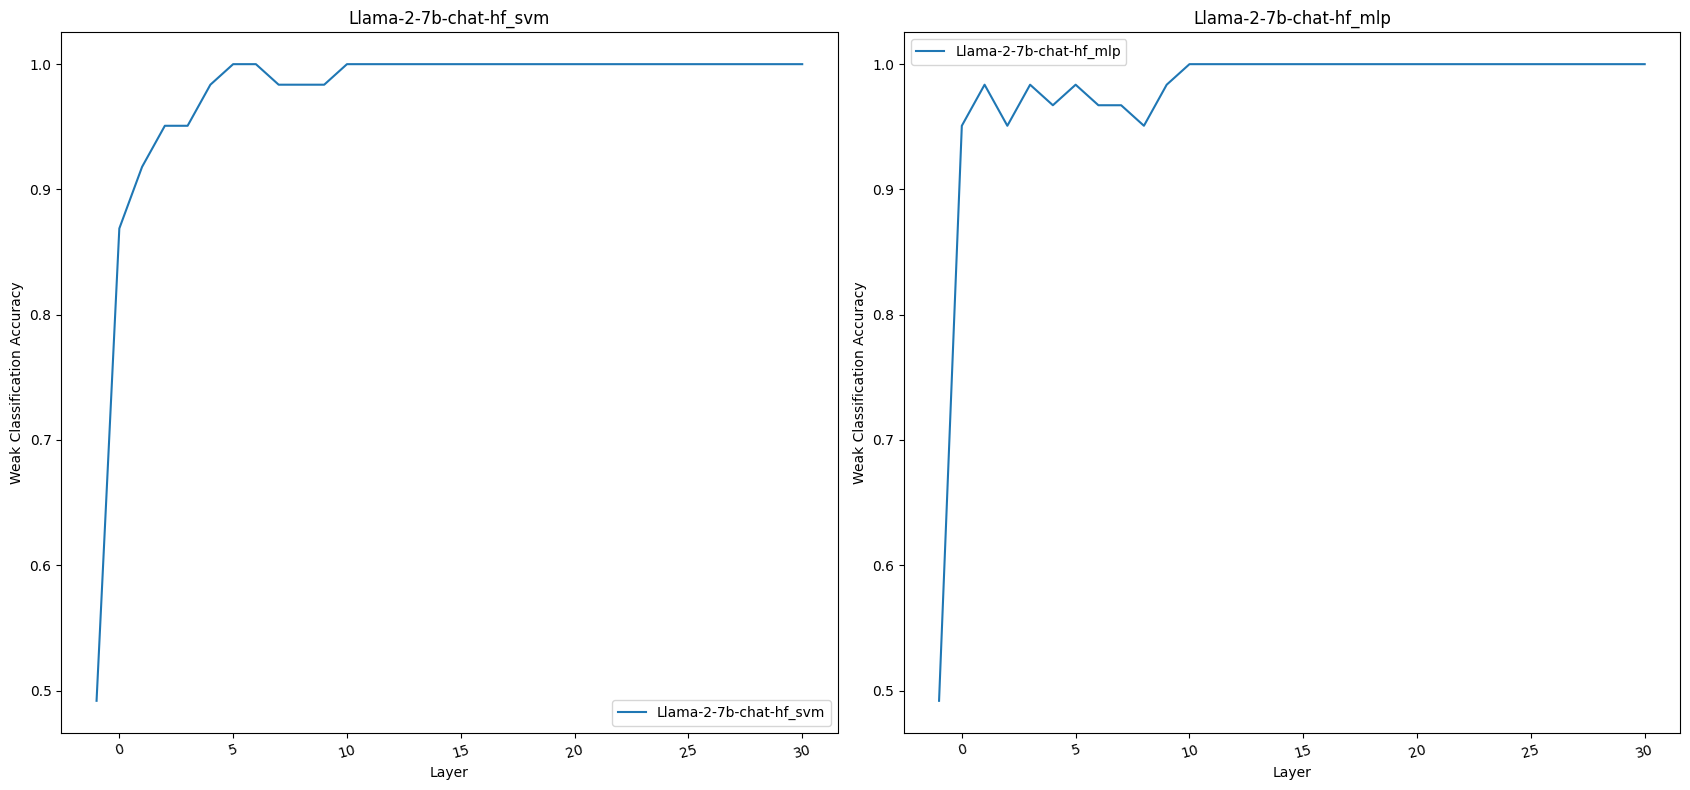

In [4]:
test.train_classifier(classifier_path_svm, classifier_path_mlp, scaler_path_mlp, classifier_list=["svm", "mlp"])